In [1]:
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
import kaipy.kaiViz as kv
import matplotlib.gridspec as gridspec
import numpy as np
import kaipy.gamera.msphViz as mviz
import kaipy.remix.remix as remix
import kaipy.gamera.magsphere as msph
%matplotlib inline

## Import the Magnetosphere data
Start by importing the magnetosphere data. You will need to set the fdir varible to the directory containing the output from a Kaiju magnetosphere run. The ftag varible will need to be set to the name that identifies the Kaiju ouput.

In [2]:
fdir ='/home/jovyan/group_shares/jupyter_research_pokeball_student/hdf5_cheyenne_1'
ftag = 'dcw'

First we import the magnetospheric data. For this example we will set the step we want to display to the final step of the run.

In [3]:
gsph = msph.GamsphPipe(fdir,ftag,doFast=False)

Initializing Earth magnetosphere
Opening pipe: /home/jovyan/group_shares/jupyter_research_pokeball_student/hdf5_cheyenne_1 : dcw
/home/jovyan/group_shares/jupyter_research_pokeball_student/hdf5_cheyenne_1/dcw.h5 not found, looking for MPI database
	Found 64 = (8,8,1) ranks
Found 8 timesteps
	Time = [47250.003769,52470.005896]
	Steps = [0,7]
Grid size = (192,192,256)
	Cells = 9.437184e+06
Variables (Root/Step) = (7,18)
	Root: ['Bx0', 'BxD', 'By0', 'ByD', 'Bz0', 'BzD', 'dV']
	Step: ['Bx', 'By', 'Bz', 'Cs', 'D', 'Jx', 'Jy', 'Jz', 'P', 'Pb', 'SrcD', 'SrcDT', 'SrcP', 'SrcX1', 'SrcX2', 'Vx', 'Vy', 'Vz']
Units Type = EARTH
Pulling grid ...
Del = (24,24,256)
Found MJD data
	Time (Min/Max) = 56368.546875/56368.607292
Found ReMIX data, reading ...


In [4]:
nstep = gsph.sFin

## Import Ionosphere data
 
Importing the ionospheric data from REMIX follow the same format as the import of the magnetospheric data with the added requirement of specifying which hemisphere, e.g. NORTH or SOUTH, that you want to plot.

In [5]:
mixFiles = fdir+"/%s.mix.h5"%(ftag)
ion = remix.remix(mixFiles,nstep)
ion.init_vars('NORTH')

##  Plot the results

Do to the clever programming of the Kaiju team it is possible to combine magnetosphere and ionosphere plots into a single image. 

Note the utlization of gridspec and add subplot to control the location of the main plot and related colorbars.   The colorbar object is not returned by the REMIX plotting routines so their is the need to regenerate it using the calls kv.genCB.  

Reading dcw/Step#7/P


Text(0.5, 1.0, "Earth's Magnetosphere and Ionosphere")

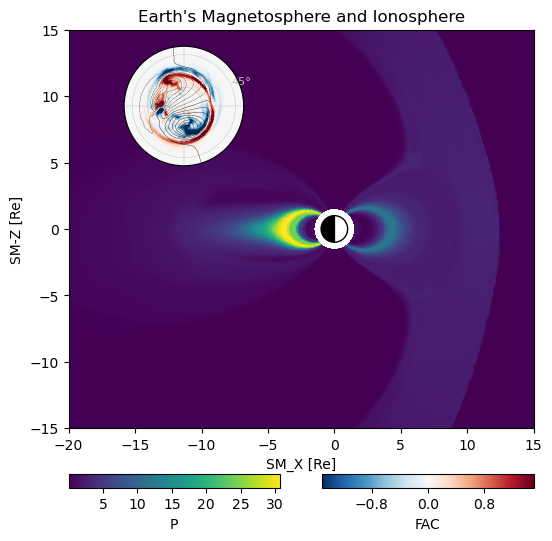

In [32]:
figSz = (6,6)
fig = plt.figure(figsize=figSz)
gs = fig.add_gridspec(2,2,height_ratios=[30,1])
Ax1,AxC1,AxC2 = fig.add_subplot(gs[0,:]),fig.add_subplot(gs[1,0]),fig.add_subplot(gs[1,1])
xyBds = [-20,15,-15,15]
data = mviz.plotXZ(gsph,nstep,xyBds,Ax1,AxC1,var='P')
Ax1Inset = gs[0,:].subgridspec(20,20)
wXY, dX, dY  = 6,2,1
AxIon = ion.plot('current',gs=Ax1Inset[dY:dY+wXY,dX:dX+wXY],doInset=True)
cbM = kv.genCB(AxC2,kv.genNorm(remix.facMax),"FAC",cM=remix.facCM,Ntk=4)
Ax1.set_title("Earth's Magnetosphere and Ionosphere")